In [ ]:
# Selection Sort Implementation
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Quicksort Implementation
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)


In [ ]:
# Merge Sort Implementation
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


In [4]:
import random
import numpy as np

# Function to generate test cases
def generate_test_cases():
    sizes = [1000, 10000, 100000]
    test_cases = {}

    for size in sizes:
        test_cases[size] = {
            'randomized': [random.randint(1, 100000) for _ in range(size)],
            'ascending': list(range(size)),
            'descending': list(range(size, 0, -1)),
        }

    # Extra credit: Combining seeded RNGs
    for size in sizes:
        seed1 = 42
        seed2 = 100
        random.seed(seed1)
        np.random.seed(seed2)
        combined_random = [random.randint(1, 100000) + i * np.random.randint(1, 100000) + (i**2) * np.random.randint(1, 100000) for i in range(size)]
        test_cases[size]['combined_random'] = combined_random

    return test_cases

# Generate the test cases
test_cases = generate_test_cases()


In [5]:
import numpy as np
import time
from multiprocessing import Pool, cpu_count

# I redefine the sorting algorithms to impliment snippet with extra credit (heap sort,100,000 element data sets and parallel execution).
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Extra Credit: Add a 4th sorting algorithm (Heap Sort)
def heap_sort(arr):
    import heapq
    return list(heapq.nsmallest(len(arr), arr))

# Function to time sorting for a single run
def time_sort(sort_func, array):
    arr_copy = array[:]  # Faster copying method
    start_time = time.perf_counter()  # More precise timing
    sort_func(arr_copy)
    end_time = time.perf_counter()
    return end_time - start_time

# Function to test sorting algorithms with parallel execution
def test_sorting_algorithms_parallel(sort_func, test_cases):
    results = {}
    for size, cases in test_cases.items():
        results[size] = {}
        for case_type, array in cases.items():
            # Prepare the arguments for parallel execution
            args = [(sort_func, array) for _ in range(3)]  # Create a list of (sort_func, array) tuples

            # Using Pool to parallelize the timing runs
            with Pool(processes=min(cpu_count(), 3)) as pool:  # Optimize number of processes
                runtimes = pool.starmap(time_sort, args)  # Use starmap to unpack arguments

            # Calculate the average runtime
            average_runtime = np.mean(runtimes)
            results[size][case_type] = average_runtime
    return results

# Generate original test cases (including large dataset of 100,000 elements)
def generate_original_test_cases():
    sizes = [1000, 10000, 100000]
    test_cases = {}
    for size in sizes:
        test_cases[size] = {
            'randomized': [np.random.randint(1, 100000) for _ in range(size)],
            'ascending': list(range(size)),
            'descending': list(range(size, 0, -1)),
        }
    return test_cases

# Generate the original test cases
original_test_cases = generate_original_test_cases()

# Test the function with the previously defined sorting algorithms and Heap Sort on the original datasets
# Skip Selection Sort for the largest size due to its inefficiency
selection_sort_results_parallel = {
    size: test_sorting_algorithms_parallel(selection_sort, {size: cases})
    for size, cases in original_test_cases.items() if size <= 10000
}

quicksort_results_parallel = test_sorting_algorithms_parallel(quicksort, original_test_cases)
merge_sort_results_parallel = test_sorting_algorithms_parallel(merge_sort, original_test_cases)
heap_sort_results_parallel = test_sorting_algorithms_parallel(heap_sort, original_test_cases)

(selection_sort_results_parallel, quicksort_results_parallel, merge_sort_results_parallel, heap_sort_results_parallel)


({1000: {1000: {'randomized': 0.08221690266668702,
    'ascending': 0.07548684133333457,
    'descending': 0.08206746299998713}},
  10000: {10000: {'randomized': 8.580547544999982,
    'ascending': 8.632687177,
    'descending': 9.394889225666665}}},
 {1000: {'randomized': 0.0051050846666953476,
   'ascending': 0.003635527666650281,
   'descending': 0.006013019000003321},
  10000: {'randomized': 0.05524449533334064,
   'ascending': 0.04021090733332736,
   'descending': 0.04130567133332382},
  100000: {'randomized': 0.6402309900000015,
   'ascending': 0.8104501736666899,
   'descending': 0.4791627363333267}},
 {1000: {'randomized': 0.006872184333322669,
   'ascending': 0.0049051313333544995,
   'descending': 0.004979860666651348},
  10000: {'randomized': 0.08564402100002629,
   'ascending': 0.04835538699999612,
   'descending': 0.05214144800000516},
  100000: {'randomized': 0.9772459616666728,
   'ascending': 0.7414345956666656,
   'descending': 0.9888236156666798}},
 {1000: {'randomize

Summary Table of Sorting Algorithms Performance:
         Algorithm    Size   Case Type  Average Time (seconds)
0   Selection Sort    1000  randomized                0.082217
1   Selection Sort    1000   ascending                0.075487
2   Selection Sort    1000  descending                0.082067
3   Selection Sort   10000  randomized                8.580548
4   Selection Sort   10000   ascending                8.632687
5   Selection Sort   10000  descending                9.394889
6        Quicksort    1000  randomized                0.005105
7        Quicksort    1000   ascending                0.003636
8        Quicksort    1000  descending                0.006013
9        Quicksort   10000  randomized                0.055244
10       Quicksort   10000   ascending                0.040211
11       Quicksort   10000  descending                0.041306
12       Quicksort  100000  randomized                0.640231
13       Quicksort  100000   ascending                0.810450
14    

,Algorithm,Size,Case Type,Average Time (seconds)
0,Selection Sort,1000,randomized,0.082217
1,Selection Sort,1000,ascending,0.075487
2,Selection Sort,1000,descending,0.082067
3,Selection Sort,10000,randomized,8.580548
4,Selection Sort,10000,ascending,8.632687
5,Selection Sort,10000,descending,9.394889
6,Quicksort,1000,randomized,0.005105
7,Quicksort,1000,ascending,0.003636
8,Quicksort,1000,descending,0.006013
9,Quicksort,10000,randomized,0.055244


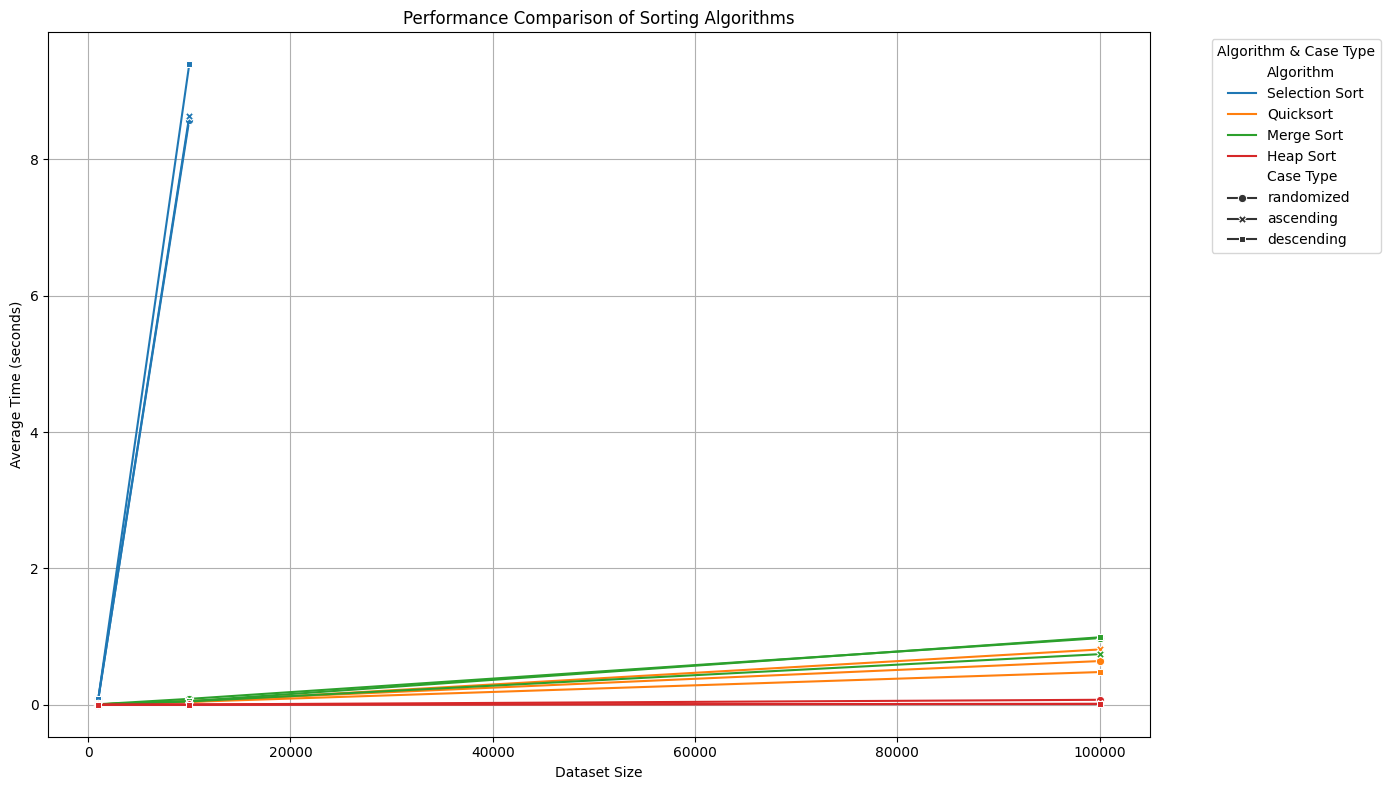

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine results into a DataFrame
def create_results_dataframe(selection_sort_results, quicksort_results, merge_sort_results, heap_sort_results):
    data = {
        "Algorithm": [],
        "Size": [],
        "Case Type": [],
        "Average Time (seconds)": []
    }

    # Add Selection Sort results
    for size, cases in selection_sort_results.items():
        for case_type, avg_time in cases[size].items():
            data["Algorithm"].append("Selection Sort")
            data["Size"].append(size)
            data["Case Type"].append(case_type)
            data["Average Time (seconds)"].append(avg_time)

    # Add Quicksort results
    for size, cases in quicksort_results.items():
        for case_type, avg_time in cases.items():
            data["Algorithm"].append("Quicksort")
            data["Size"].append(size)
            data["Case Type"].append(case_type)
            data["Average Time (seconds)"].append(avg_time)

    # Add Merge Sort results
    for size, cases in merge_sort_results.items():
        for case_type, avg_time in cases.items():
            data["Algorithm"].append("Merge Sort")
            data["Size"].append(size)
            data["Case Type"].append(case_type)
            data["Average Time (seconds)"].append(avg_time)

    # Add Heap Sort results
    for size, cases in heap_sort_results.items():
        for case_type, avg_time in cases.items():
            data["Algorithm"].append("Heap Sort")
            data["Size"].append(size)
            data["Case Type"].append(case_type)
            data["Average Time (seconds)"].append(avg_time)

    return pd.DataFrame(data)

# Create DataFrame from results
results_df = create_results_dataframe(
    selection_sort_results_parallel,
    quicksort_results_parallel,
    merge_sort_results_parallel,
    heap_sort_results_parallel
)

# Display the results table
print("Summary Table of Sorting Algorithms Performance:")
print(results_df)

# Display the table in a more structured way
display(results_df)

# Visualization: Line Graph
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=results_df,
    x="Size",
    y="Average Time (seconds)",
    hue="Algorithm",
    style="Case Type",
    markers=True,
    dashes=False
)
plt.title("Performance Comparison of Sorting Algorithms")
plt.xlabel("Dataset Size")
plt.ylabel("Average Time (seconds)")
plt.grid(True)
plt.legend(title="Algorithm & Case Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os

# Ensure the directory exists
save_dir = "/mnt/data/sorting_report"
os.makedirs(save_dir, exist_ok=True)

# Combine results into a DataFrame
def create_results_dataframe(selection_sort_results, quicksort_results, merge_sort_results, heap_sort_results):
    data = {
        "Algorithm": [],
        "Size": [],
        "Case Type": [],
        "Average Time (seconds)": []
    }

    # Add Selection Sort results
    for size, cases in selection_sort_results.items():
        for case_type, avg_time in cases[size].items():
            data["Algorithm"].append("Selection Sort")
            data["Size"].append(size)
            data["Case Type"].append(case_type)
            data["Average Time (seconds)"].append(avg_time)

    # Add Quicksort results
    for size, cases in quicksort_results.items():
        for case_type, avg_time in cases.items():
            data["Algorithm"].append("Quicksort")
            data["Size"].append(size)
            data["Case Type"].append(case_type)
            data["Average Time (seconds)"].append(avg_time)

    # Add Merge Sort results
    for size, cases in merge_sort_results.items():
        for case_type, avg_time in cases.items():
            data["Algorithm"].append("Merge Sort")
            data["Size"].append(size)
            data["Case Type"].append(case_type)
            data["Average Time (seconds)"].append(avg_time)

    # Add Heap Sort results
    for size, cases in heap_sort_results.items():
        for case_type, avg_time in cases.items():
            data["Algorithm"].append("Heap Sort")
            data["Size"].append(size)
            data["Case Type"].append(case_type)
            data["Average Time (seconds)"].append(avg_time)

    return pd.DataFrame(data)

# Create DataFrame from results
results_df = create_results_dataframe(
    selection_sort_results_parallel,
    quicksort_results_parallel,
    merge_sort_results_parallel,
    heap_sort_results_parallel
)

# Save the summary table as an image
summary_table_path = os.path.join(save_dir, "summary_table.png")
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
plt.savefig(summary_table_path, bbox_inches='tight')
plt.close()

# Visualization: Line Graph
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=results_df,
    x="Size",
    y="Average Time (seconds)",
    hue="Algorithm",
    style="Case Type",
    markers=True,
    dashes=False
)
plt.title("Performance Comparison of Sorting Algorithms")
plt.xlabel("Dataset Size")
plt.ylabel("Average Time (seconds)")
plt.grid(True)
plt.legend(title="Algorithm & Case Type", bbox_to_anchor=(1.05, 1), loc='upper left')
line_graph_path = os.path.join(save_dir, "line_graph.png")
plt.tight_layout()
plt.savefig(line_graph_path)
plt.close()

# Create PDF report
report_path = os.path.join(save_dir, "Sorting_Algorithms_Performance_Report.pdf")
with PdfPages(report_path) as pdf:
    # Add title page
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Sorting Algorithms Performance Report', horizontalalignment='center', verticalalignment='center', fontsize=20)
    plt.axis('off')
    pdf.savefig()
    plt.close()

    # Add summary table
    plt.figure(figsize=(10, 6))
    plt.imshow(plt.imread(summary_table_path))
    plt.axis('off')
    pdf.savefig()
    plt.close()

    # Add line graph
    plt.figure(figsize=(10, 6))
    plt.imshow(plt.imread(line_graph_path))
    plt.axis('off')
    pdf.savefig()
    plt.close()

    # Add Summary Report
    plt.figure(figsize=(10, 6))

    plt.axis('off')
    pdf.savefig()
    plt.close()

print("Report generated and saved to:", report_path)

# List the files to confirm
os.listdir(save_dir)


Report generated and saved to: /mnt/data/sorting_report/Sorting_Algorithms_Performance_Report.pdf


['line_graph.png',
 'summary_table.png',
 'Sorting_Algorithms_Performance_Report.pdf']